# Assignment6

## Import library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
df = pd.read_excel('bmi_data_phw1.xlsx')
df.head()

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,30,63.7902,116.7431,3
1,Female,32,66.7917,125.1554,3
2,Female,27,71.1411,137.1114,3
3,Male,24,66.6432,86.9820,0
4,Female,19,69.4712,138.7444,3


## Data exploration

### Print dataset statistical data

In [3]:
df.describe()

,Age,Height (Inches),Weight (Pounds),BMI
count,100.000000,100.000000,100.000000,100.000000
mean,27.710000,67.753037,124.101520,2.420000
std,5.347132,2.061955,16.745017,1.036505
min,18.000000,63.125500,83.085300,0.000000
25%,23.750000,66.535825,116.573575,2.000000
50%,28.000000,67.805600,124.675200,3.000000
75%,32.250000,69.064800,134.534375,3.000000
max,35.000000,73.268700,164.586500,4.000000


In [4]:
df.columns

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

In [5]:
df.columns = ['Sex','Age','Height','Weight','BMI']

In [6]:
df.dtypes

Sex        object
Age         int64
Height    float64
Weight    float64
BMI         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     100 non-null    object 
 1   Age     100 non-null    int64  
 2   Height  100 non-null    float64
 3   Weight  100 non-null    float64
 4   BMI     100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


### Plot height & weight historgrams(bins=10) for each BMI value

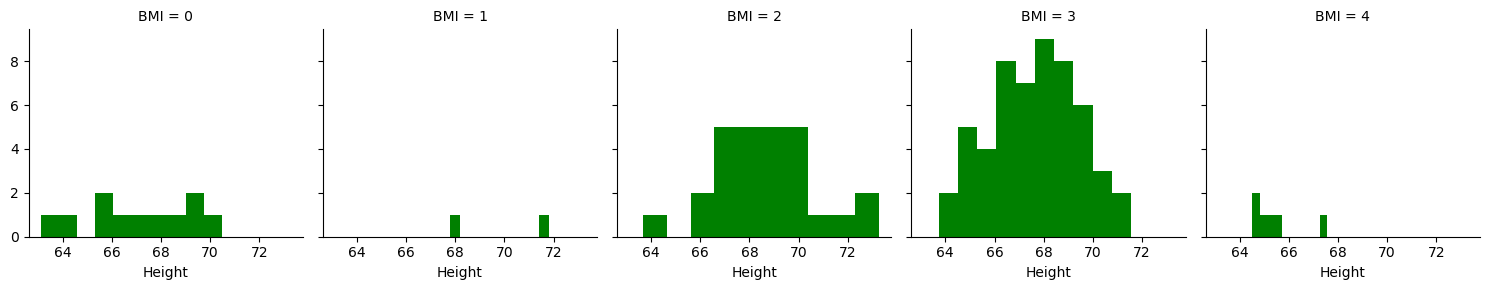

In [19]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

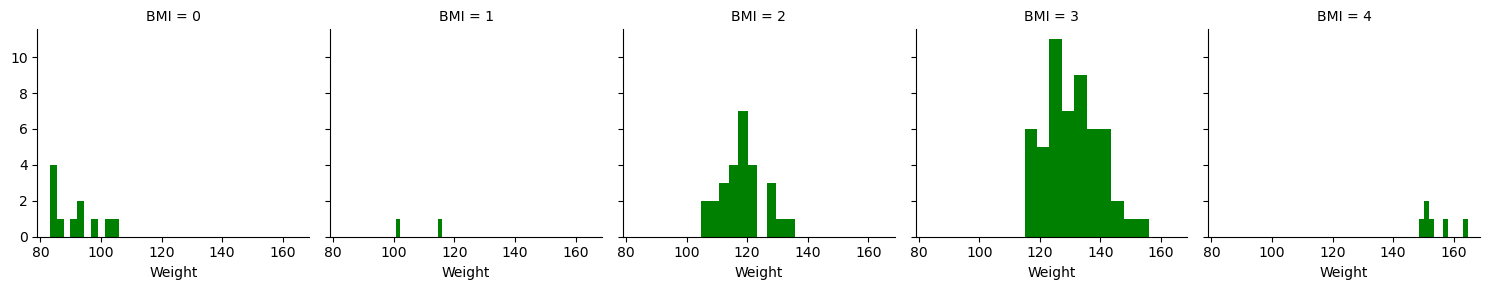

In [20]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [21]:
tmp = df.copy()
Scaler = RobustScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = RobustScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

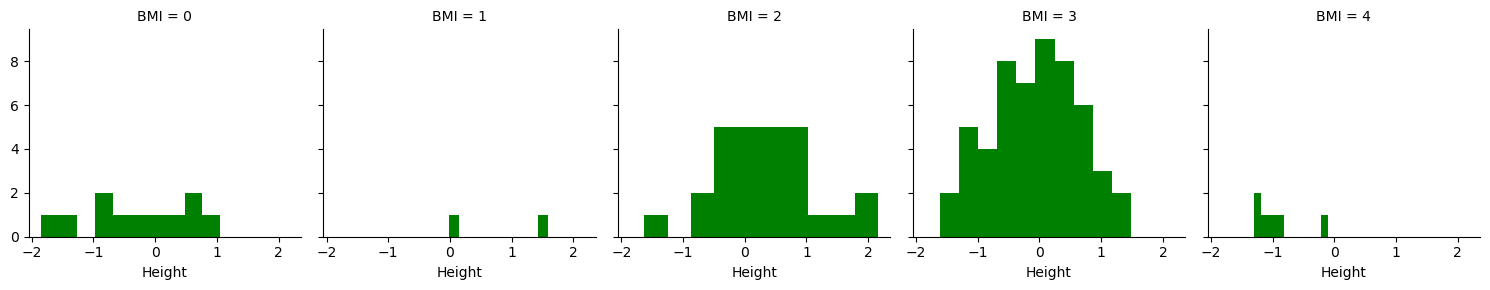

In [22]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

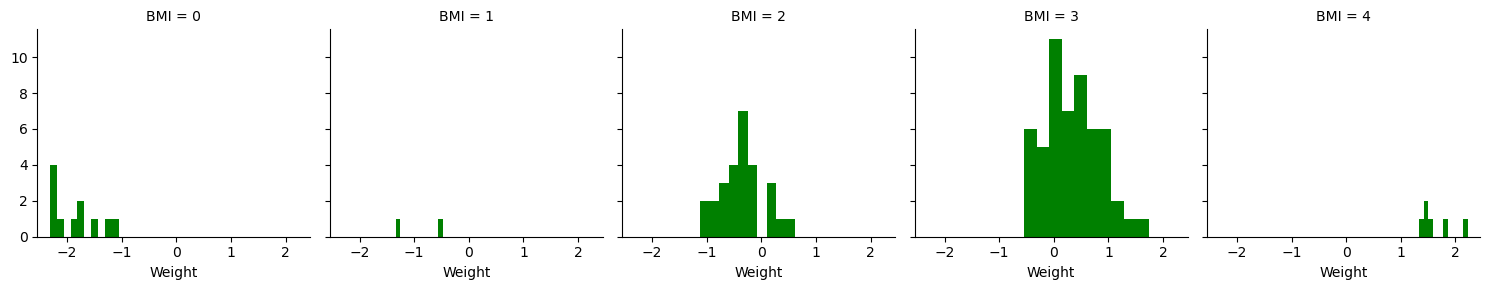

In [23]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [24]:
tmp = df.copy()
Scaler = StandardScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = StandardScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

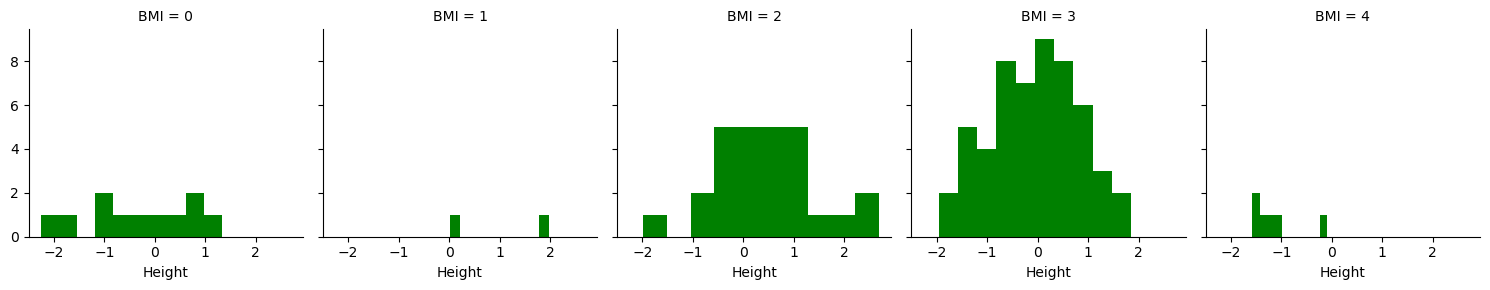

In [25]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

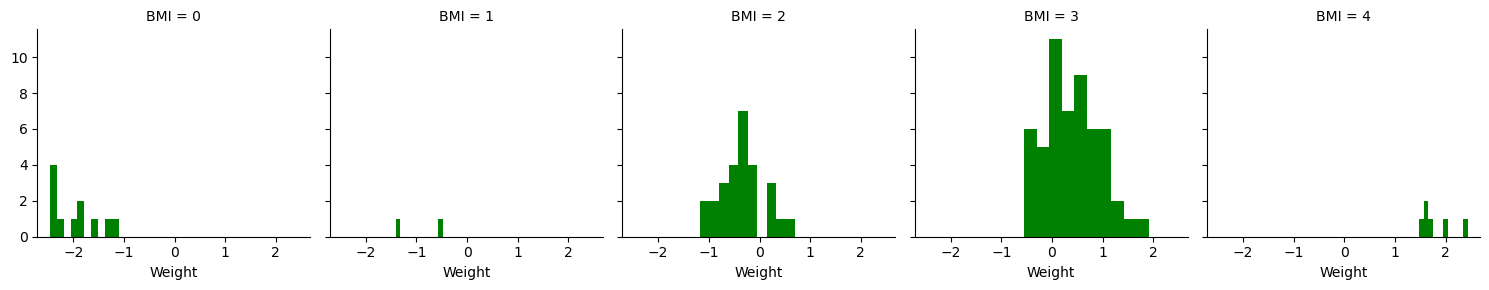

In [26]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [27]:
tmp = df.copy()
Scaler = MinMaxScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = MinMaxScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

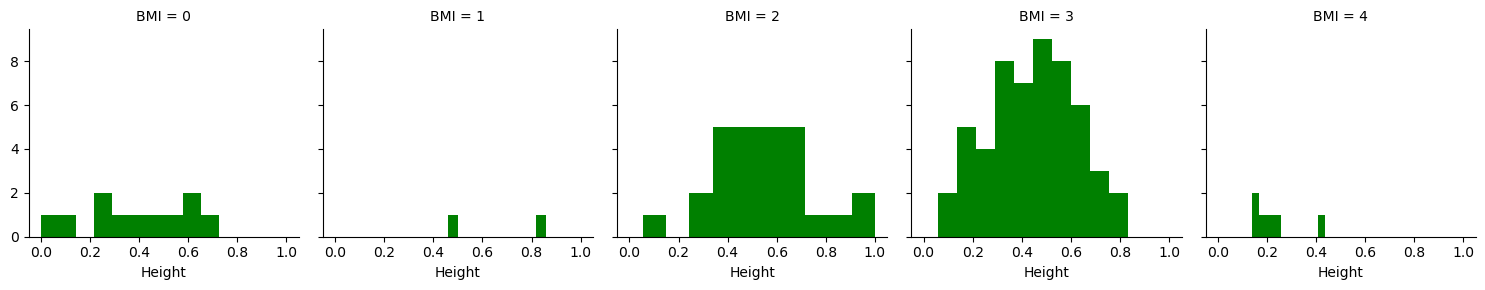

In [28]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

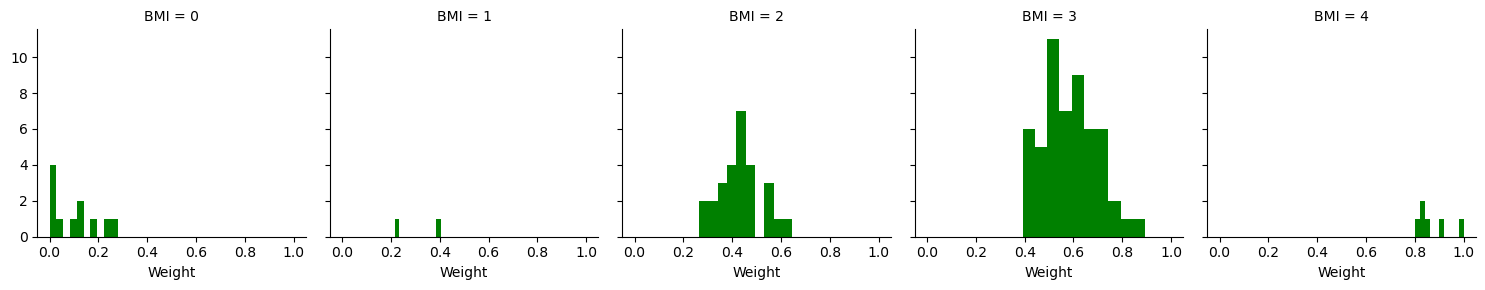

In [29]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [30]:
model = linear_model.LinearRegression()
model.fit(df['Height'].to_numpy()[:,np.newaxis], df['Weight'].to_numpy()[:,np.newaxis])

LinearRegression()

In [31]:
w1 = model.coef_[0][0]
w0 = model.intercept_[0]

diff = []
for H,W in zip(df['Height'].to_numpy(),df['Weight'].to_numpy()):
    diff.append(W - (w1*H + w0))
diff

[-1.0595475624902946,
 2.5819113402893663,
 7.62460257192356,
 -35.355450044705705,
 11.911884613652092,
 -27.42225314456806,
 -4.863258622778332,
 -5.356169586051507,
 -5.468240748545057,
 -16.175960006683496,
 -6.462626999035223,
 -22.647841054643706,
 25.796078678344173,
 7.697350173928427,
 1.8300129117359205,
 -10.465805273371203,
 -0.262189728641232,
 14.9552704781062,
 4.37260113678613,
 5.76823685929935,
 -11.020475746481864,
 -24.99674935122212,
 16.86926966949163,
 0.5067891609540425,
 -4.922537457040633,
 23.708811288018424,
 -33.2239833861191,
 16.404510054437793,
 22.12150855301401,
 11.11043607663811,
 -13.450501383684838,
 8.80378209728184,
 9.575960253424796,
 -14.50376029160401,
 -11.40865729524485,
 31.678846195428733,
 -29.12877225170756,
 -7.433723815134741,
 -1.7325753621589683,
 12.0180882006661,
 -3.538296378610866,
 18.32956220919425,
 3.706765507187015,
 -0.9677196357527436,
 -12.98312002895159,
 -12.345026543650789,
 -9.289493858139878,
 -4.545379340658656,
 4

In [54]:
Scaler = StandardScaler()
normalize = Scaler.fit_transform(np.array(diff).reshape(-1,1))
normalize = np.squeeze(normalize)

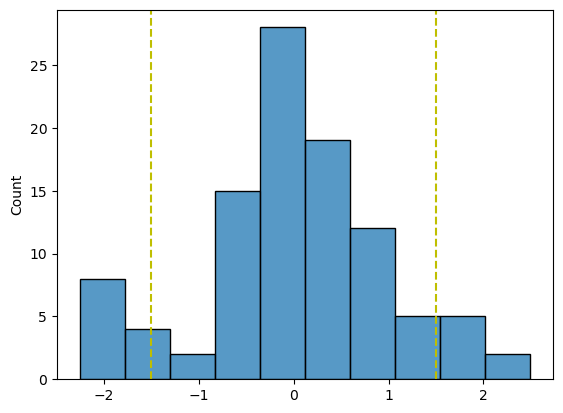

In [55]:
sns.histplot(normalize,bins=10)
a = 1.5
plt.axvline(-a, 0, 30,color='y', linestyle='--')
plt.axvline(a, 0, 30,color='y', linestyle='--')

## More Programming

In [56]:
man_df = df[df['Sex']=='Male']
wom_df = df[df['Sex']=='Female']

In [57]:
def same(df:pd.DataFrame):
    model = linear_model.LinearRegression()
    model.fit(df['Height'].to_numpy()[:,np.newaxis], df['Weight'].to_numpy()[:,np.newaxis])
    w1 = model.coef_[0][0]
    w0 = model.intercept_[0]

    diff = []
    for H,W in zip(df['Height'].to_numpy(),df['Weight'].to_numpy()):
        diff.append(W - (w1*H + w0))

    Scaler = StandardScaler()
    normalize = Scaler.fit_transform(np.array(diff).reshape(-1,1))
    normalize = np.squeeze(normalize)

    sns.histplot(normalize,bins=10)
    a = 1.5
    plt.axvline(-a, 0, 30,color='y', linestyle='--')
    plt.axvline(a, 0, 30,color='y', linestyle='--')

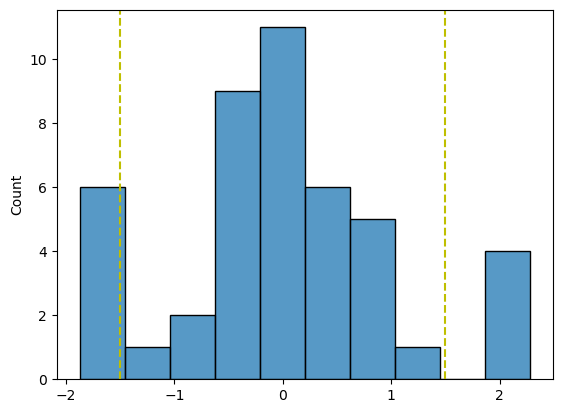

In [58]:
same(man_df)

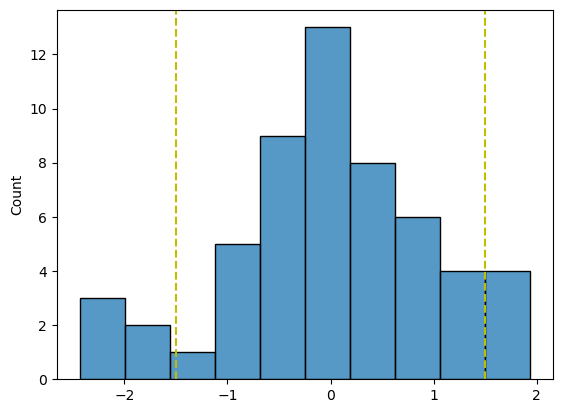

In [59]:
same(wom_df)

In [71]:
def predict_bmi(df): 
    model = linear_model.LinearRegression()
    model.fit(df['Height'].to_numpy()[:,np.newaxis], df['Weight'].to_numpy()[:,np.newaxis])
    w1 = model.coef_[0][0]
    w0 = model.intercept_[0]

    diff = []
    for H,W in zip(df['Height'].to_numpy(),df['Weight'].to_numpy()):
        diff.append(W - (w1*H + w0))

    Scaler = StandardScaler()
    normalize = Scaler.fit_transform(np.array(diff).reshape(-1,1))
    normalize = np.squeeze(normalize)
    tmp = []
    for i in normalize:
        if(i > 1.5):
            i = 4
        elif(i>0.5):
            i = 3
        elif(i>=-0.5):
            i = 2
        elif(i>=-1.5):
            i = 1
        else:
            i = 0
        tmp.append(i)
    return tmp

In [72]:
pd.set_option('display.max_rows',None)
man_df['predict'] = predict_bmi(man_df)
wom_df['predict'] = predict_bmi(wom_df)
predict_df = pd.concat([man_df,wom_df],axis=0)
predict_df.sort_index()

,Sex,Age,Height,Weight,BMI,predict
0,Female,30,63.7902,116.7431,3,2
1,Female,32,66.7917,125.1554,3,2
2,Female,27,71.1411,137.1114,3,3
3,Male,24,66.6432,86.9820,0,0
4,Female,19,69.4712,138.7444,3,3
5,Female,35,68.4899,97.8505,0,0
6,Female,23,65.0693,114.9725,3,1
7,Male,25,69.1617,120.9844,2,2
8,Female,29,66.5699,116.7527,3,1
9,Female,28,66.6841,106.2265,2,1


In [73]:
cnt = 0
for i,j in zip(predict_df['BMI'].tolist(),predict_df['predict'].tolist()):
    if(i==j):
        cnt+=1

cnt / 100

0.55